<a href="https://colab.research.google.com/github/tamnhu2913/quantium-Data-Analytics/blob/main/Quantium_Virtual_Internship_Retail_Strategy_and_Analytics_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set(color_codes=True, context="notebook", style='whitegrid', palette="Dark2")

from google.colab import drive
drive.mount('/content/drive')

# Transaction data

## Loading data

In [ ]:
trans_df = pd.read_excel('/content/Data/QVI_transaction_data.xlsx')
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
trans_df['DATE'] = pd.to_datetime(trans_df['DATE'],unit='D',origin='1899-12-30')
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Examining data

Examining type of product in data.

In [ ]:
trans_df['PROD_NAME'].value_counts().reset_index()

,PROD_NAME,count
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
...,...,...
109,RRD Pc Sea Salt 165g,1431
110,Woolworths Medium Salsa 300g,1430
111,NCC Sour Cream & Garden Chives 175g,1419
112,French Fries Potato Chips 175g,1418


Since, there are many name of products, so we confuse that there may be products other than chips in data.

In [ ]:
product = trans_df['PROD_NAME'].value_counts().reset_index()
product.rename(columns = {'PROD_NAME': 'name', 'count': 'total'}, inplace=True)
product['name'] = product['name'].str.replace('\d+g|[#,@,&,/]', '', regex=True)
product

,name,total
0,Kettle Mozzarella Basil Pesto,3304
1,Kettle Tortilla ChpsHnyJlpno Chili,3296
2,Cobs Popd SwtChlli SrCream Chips,3269
3,Tyrrells Crisps Ched Chives,3268
4,Cobs Popd Sea Salt Chips,3265
...,...,...
109,RRD Pc Sea Salt,1431
110,Woolworths Medium Salsa,1430
111,NCC Sour Cream Garden Chives,1419
112,French Fries Potato Chips,1418


In [ ]:
product_freq = product['name'].str.split(expand=True).stack().reset_index(drop=True).value_counts()
product_freq.head(15)

,count
Chips,21
Smiths,16
Crinkle,14
Cut,14
Kettle,13
Salt,12
Cheese,12
Original,10
Chip,9
Doritos,9


We see that 9 products are salsa but we are only interested on chips. Therefore, we just use data not include salsa in transaction data.

In [ ]:
trans_df[trans_df['PROD_NAME'].str.contains('Salsa', regex=False)]['PROD_NAME'].unique()

array(['Old El Paso Salsa   Dip Tomato Mild 300g',
       'Red Rock Deli SR    Salsa & Mzzrlla 150g',
       'Smiths Crinkle Cut  Tomato Salsa 150g',
       'Doritos Salsa       Medium 300g',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Woolworths Mild     Salsa 300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Woolworths Medium   Salsa 300g', 'Doritos Salsa Mild  300g'],
      dtype=object)

Except Red Rock Deli SR Salsa & Mzzrlla 150g is a chip with salsa flavoured.  So, we need to be careful not to remove these chips.

In [ ]:
trans_chip_df = trans_df[~trans_df['PROD_NAME'].str.contains('Salsa',regex=False) | trans_df['PROD_NAME'].str.startswith('Red Rock Deli')]
print(trans_chip_df.shape)

(248200, 8)


In [ ]:
#check null values
trans_chip_df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [ ]:
trans_chip_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,248200,248200.000000,2.482000e+05,2.482000e+05,248200.000000,248200.000000,248200.000000
mean,2018-12-30 02:14:49.991941632,135.056882,1.355348e+05,1.351367e+05,56.396716,1.907953,7.308284
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001800e+04,6.758575e+04,27.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030852e+05,2.026610e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.783028,8.068886e+04,7.814240e+04,33.601397,0.658477,3.074372


The trans_chip_df dataframe does not have null values. But by the describe, there may be have outlier on PROD_QTY.

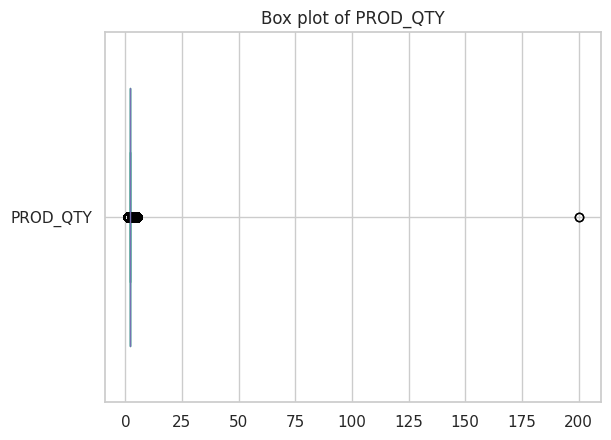

In [ ]:
trans_chip_df['PROD_QTY'].plot(kind = 'box', widths = 0.7, vert = False)
plt.title('Box plot of PROD_QTY')
plt.show()

In [ ]:
trans_chip_df[trans_chip_df['PROD_QTY'] == trans_chip_df['PROD_QTY'].max()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
trans_chip_df[trans_chip_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


The PROD_QTY at 200 is an outlier, and client 226000 does not appear to be a retail customer. So, removing this client from the data does not affect our data.

In [ ]:
trans_chip_df = trans_chip_df[trans_chip_df['LYLTY_CARD_NBR'] != 226000]
trans_chip_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,248198,248198.000000,2.481980e+05,2.481980e+05,248198.000000,248198.000000,248198.000000
mean,2018-12-30 02:14:47.272258560,135.056149,1.355341e+05,1.351359e+05,56.397139,1.906357,7.303106
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001800e+04,6.758525e+04,27.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030850e+05,2.026598e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.782904,8.068877e+04,7.814229e+04,33.601203,0.342621,2.474547


Next, we will look at the number of transaction over times to see if there are missing values.

In [ ]:
count_trans = trans_chip_df['DATE'].value_counts().sort_index().reset_index()
count_trans

,DATE,count
0,2018-07-01,669
1,2018-07-02,657
2,2018-07-03,682
3,2018-07-04,673
4,2018-07-05,663
...,...,...
359,2019-06-26,662
360,2019-06-27,672
361,2019-06-28,680
362,2019-06-29,704


This demonstrates that transaction data was gathered from July 1, 2018, to June 30, 2019. But there are only 364 rows, so we have a missing value.

In [ ]:
date = pd.date_range(start='2018-7-1', end='2019-6-30')
date = pd.DataFrame(date, columns=['DATE'])
merge_date = pd.merge(date, count_trans, on='DATE',how = 'left')
merge_date['DATE'] = pd.to_datetime(merge_date['DATE'], format = '%Y-%m-%d')
merge_date.head()

,DATE,count
0,2018-07-01,669.0
1,2018-07-02,657.0
2,2018-07-03,682.0
3,2018-07-04,673.0
4,2018-07-05,663.0


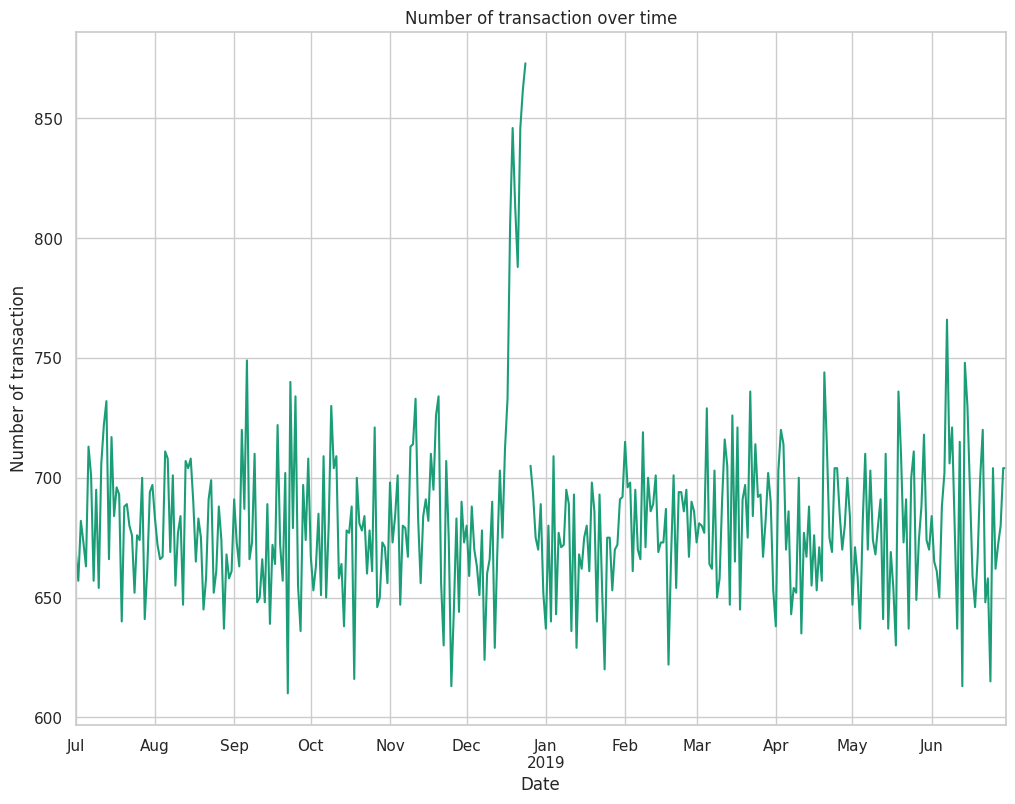

In [ ]:
ax = merge_date.plot(kind ='line', x = 'DATE', y='count', legend = False, figsize = (12,9))
plt.xlabel('Date')
plt.ylabel('Number of transaction')
plt.title('Number of transaction over time')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()

plt.show()

There is a break point in the midle of December 2018 and January 2019. Let's zoom in it.

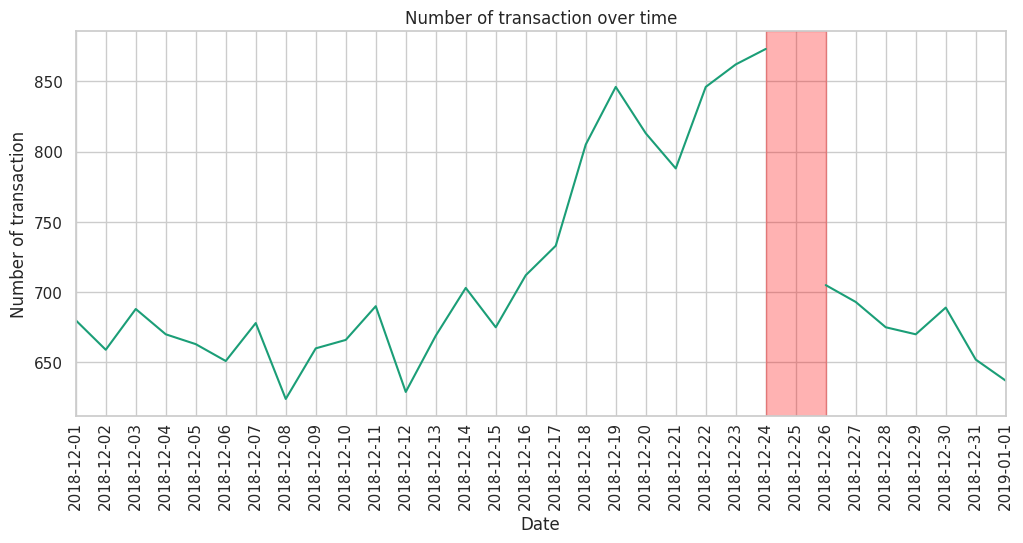

In [ ]:
data = merge_date[merge_date['DATE'].isin(pd.date_range(start='2018-12-01', end='2019-01-01'))]

ax = data.plot(kind ='line', x = 'DATE', y='count', legend = False, figsize = (12,5))
ax.axvspan(xmin = pd.to_datetime('2018-12-24'), xmax = pd.to_datetime('2018-12-26'), ymin = 0, ymax = 1, color='r', alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.tick_params(axis='x', labelrotation=90, direction = 'in')

plt.xlabel('Date')
plt.ylabel('Number of transaction')
plt.title('Number of transaction over time')

plt.show()

we saw that at the Christmax, the transaction are zeros, because of the shops being closed on this day. So we are satisfied that the data no longer has outliers.



## Featuring

Next step, we create new features such as brand name or size of pack.

### Pack size

In [ ]:
#pack size
trans_chip_df['PACK_SIZE'] = trans_chip_df['PROD_NAME'].str.extract('(\d+)').astype(int)
trans_chip_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [ ]:
trans_chip_df['PACK_SIZE'].value_counts().sort_values(ascending = False)[:5]

,count
PACK_SIZE,
175,66390
150,41661
134,25102
110,22387
170,19983


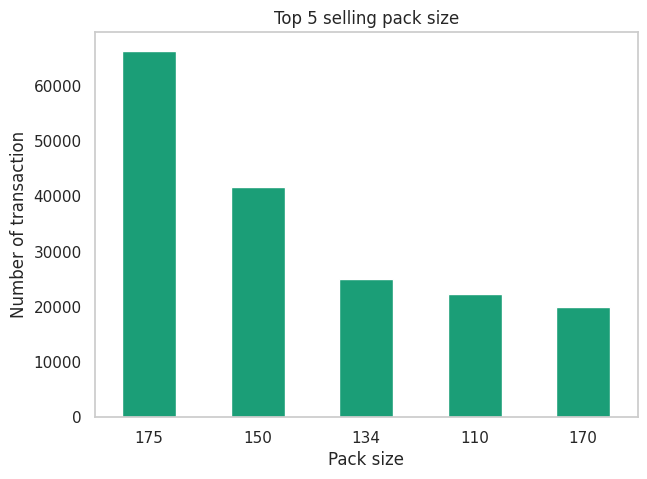

In [ ]:
trans_chip_df['PACK_SIZE'].value_counts().sort_values(ascending = False)[:5].plot(kind = 'bar', grid=False,figsize=(7,5))
plt.xlabel('PACK_SIZE')
plt.title('Top 5 selling pack size')
plt.xticks(rotation=0)
plt.xlabel('Pack size')
plt.ylabel('Number of transaction')
plt.show()

### Brand name

We know that the first word of the PROD_NAME

In [ ]:
trans_chip_df['BRAND'] = trans_chip_df['PROD_NAME'].str.split(' ').str[0]
trans_chip_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [ ]:
np.sort(trans_chip_df['BRAND'].unique())

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

Some brand names look similar as if they belong to the same brand - such as RED and RRD, which are both Red Rock Deli chips. Let’s combine these together.

In [ ]:
trans_chip_df.loc[trans_chip_df['BRAND'] == 'Red', 'BRAND'] = 'RRD'
trans_chip_df.loc[trans_chip_df['BRAND'] == 'Snbts', 'BRAND'] = 'Sunbites'
trans_chip_df.loc[trans_chip_df['BRAND'] == 'Infzns', 'BRAND'] = 'Infuzions'
trans_chip_df.loc[trans_chip_df['BRAND'] == 'WW', 'BRAND'] = 'Woolworths'
trans_chip_df.loc[trans_chip_df['BRAND'] == 'Smith', 'BRAND'] = 'Smiths'
trans_chip_df.loc[trans_chip_df['BRAND'] == 'NCC', 'BRAND'] = 'Natural'
trans_chip_df.loc[trans_chip_df['BRAND'] == 'Dorito', 'BRAND'] = 'Doritos'
trans_chip_df.loc[trans_chip_df['BRAND'] == 'Grain', 'BRAND'] = 'GrnWves'
trans_chip_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [ ]:
trans_chip_df['BRAND'].value_counts().sort_index()

,count
BRAND,
Burger,1564
CCs,4551
Cheetos,2927
Cheezels,4603
Cobs,9693
Doritos,25224
French,1418
GrnWves,7740
Infuzions,14201


# Customer Data

## Loading Data

In [ ]:
cust_df = pd.read_csv('/content/Data/QVI_purchase_behaviour.csv')
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
cust_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


## Examining data

In [ ]:
cust_df['LIFESTAGE'].value_counts()

,count
LIFESTAGE,
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


In [ ]:
cust_df['PREMIUM_CUSTOMER'].value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,29245
Budget,24470
Premium,18922


In [ ]:
# check duplicate data
cust_df.duplicated('LYLTY_CARD_NBR').sum()

0

As there do not seem to be any issues with the customer data, we can now go ahead and merge the transaction and customer data sets together.

In [ ]:
data = pd.merge(trans_chip_df, cust_df, on='LYLTY_CARD_NBR', how='left')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


Let’s also check if some customers were not matched on by checking for nulls.

In [ ]:
print('LIFESTAGE: ', data['LIFESTAGE'].isnull().sum())
print('PREMIUM_CUSTOMER: ', data['PREMIUM_CUSTOMER'].isnull().sum())

LIFESTAGE:  0
PREMIUM_CUSTOMER:  0


In [ ]:
data.to_csv('clean_data.csv', index = False)

# Data analysis on customer segments
The data was cleaned, let's now do the Analysis of Customer Behaviour. We define some metrics, such as:


*   Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
*   How many customers are in each segment
*   How many chips are bought per customer by segment
*   What's the average chip price by customer segment



In [ ]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


## Total sales on chips by Lifestage and Premium

### By Lifestage or By Premium

In [ ]:
by_lifestage = data.groupby(['LIFESTAGE'])['TOT_SALES'].agg(['mean','max','min','sum','count']).sort_values(by='sum', ascending=False)
by_lifestage

,mean,max,min,sum,count
LIFESTAGE,,,,,
OLDER SINGLES/COUPLES,7.390495,29.5,1.7,377469.55,51075
RETIREES,7.361561,29.5,1.7,343748.10,46695
OLDER FAMILIES,7.261315,29.5,1.7,330099.40,45460
YOUNG FAMILIES,7.262030,29.5,1.7,296007.60,40761
YOUNG SINGLES/COUPLES,7.162929,27.0,1.7,244563.90,34143
MIDAGE SINGLES/COUPLES,7.360088,29.5,1.7,173212.30,23534
NEW FAMILIES,7.276470,27.0,1.7,47515.35,6530


The minimum sale of all Lifestages are 1.7. Young Singles/Couples and New Families have a maximum sale of 27, while the rest have a maximum of 29.5. The total sale for  Older Singles/Couples are the highest, and the lowest is for New Families.

In [ ]:
by_premium = data.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['mean','max','min','sum','count']).sort_values(by='sum', ascending=False)
by_premium

,mean,max,min,sum,count
PREMIUM_CUSTOMER,,,,,
Mainstream,7.361301,29.5,1.7,703600.50,95581
Budget,7.264693,29.5,1.7,634004.25,87272
Premium,7.269285,29.5,1.7,475011.45,65345


Premium customers are not purchasing more chips, while Mainstream customers represent the highest total sales.

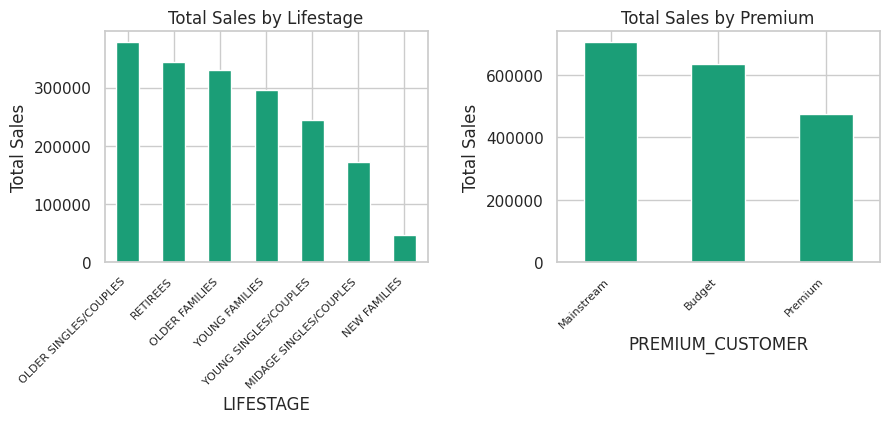

In [ ]:
plot, ax = plt.subplots(1,2, figsize = (10, 3))

by_lifestage.plot(y = 'sum', kind='bar', ax = ax[0], legend = False)
by_premium.plot(y = 'sum', kind='bar', ax = ax[1], legend = False)

for i in range(2):
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, ha = 'right', fontsize = 8)
  ax[i].set_ylabel('Total Sales')

ax[0].set_title('Total Sales by Lifestage')
ax[1].set_title('Total Sales by Premium')
plt.subplots_adjust(wspace=0.4)
plt.show()

### By Lifestage and Premium

In [ ]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33510.40,84963.75,54738.15
NEW FAMILIES,20661.45,16036.40,10817.50
OLDER FAMILIES,157646.75,96805.05,75647.60
OLDER SINGLES/COUPLES,128254.80,125188.50,124026.25
RETIREES,106291.60,145806.15,91650.35
YOUNG FAMILIES,130276.85,86770.25,78960.50
YOUNG SINGLES/COUPLES,57362.40,148030.40,39171.10


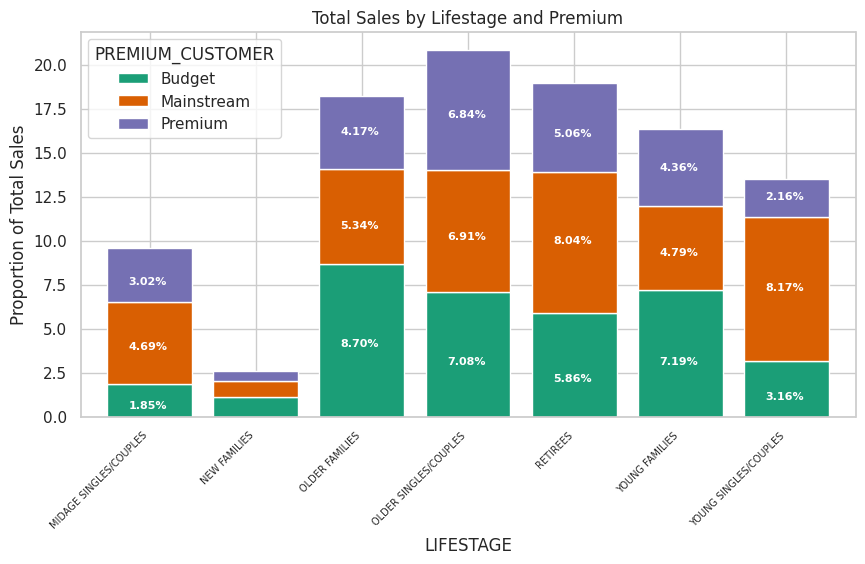

In [ ]:
dt_plt = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().div(data['TOT_SALES'].sum()).mul(100).unstack()

ax = dt_plt.plot(kind='bar', figsize = (10,5), stacked=True, width = 0.8)
for p in ax.patches:
  if p.get_height() < 1.5:
    continue
  value ='{:.2f}%'.format(p.get_height())
  x = p.get_x() + p.get_width() * 0.25
  y = np.max([p.get_y() + p.get_height() // 2, p.get_y() + 0.5])
  ax.annotate(value, (x,y), color = 'w', size = 8, weight='bold')

plt.xticks(rotation = 45, ha = 'right', fontsize = 7)
plt.ylabel('Proportion of Total Sales')
plt.title('Total Sales by Lifestage and Premium')
plt.legend(title = 'PREMIUM_CUSTOMER', loc = 'upper left')
plt.show()

Older Families-Budget, Young Singles/Couples-Mainstream and Retieers-Mainstream have the most of total sales. New Families with all Premium customers is the lowest.

## Number of customer by LIFESTAGE and PREMIUM_CUSTOMER

In [ ]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1477,3300,2375
NEW FAMILIES,1089,832,576
OLDER FAMILIES,4617,2793,2234
OLDER SINGLES/COUPLES,4856,4866,4690
RETIREES,4388,6369,3817
YOUNG FAMILIES,3957,2690,2401
YOUNG SINGLES/COUPLES,3660,7921,2487


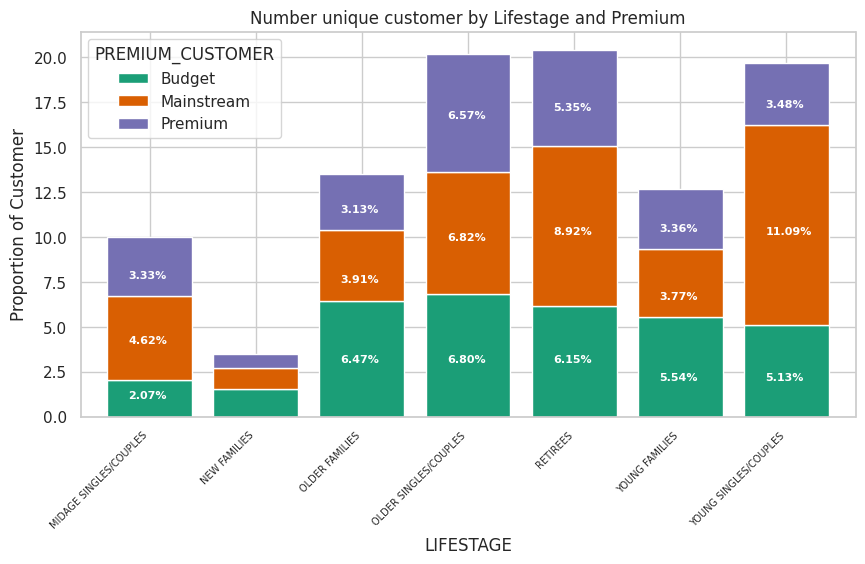

In [ ]:
dt_plt = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().div(data['LYLTY_CARD_NBR'].nunique()).mul(100).unstack()

ax = dt_plt.plot(kind='bar', figsize = (10,5), stacked=True, width = 0.8)
for p in ax.patches:
  if p.get_height() < 1.8:
    continue
  value ='{:.2f}%'.format(p.get_height())
  x = p.get_x() + p.get_width() * 0.25
  y = np.max([p.get_y() + p.get_height() // 2, p.get_y() + 0.5])
  ax.annotate(value, (x,y), color = 'w', size = 8, weight='bold')

plt.xticks(rotation = 45, ha = 'right', fontsize = 7)
plt.ylabel('Proportion of Customer')
plt.title('Number unique customer by Lifestage and Premium')
plt.legend(title = 'PREMIUM_CUSTOMER', loc = 'upper left')
plt.show()

Young Singles/Couples-Mainstream and Retieers-Mainstream are still the segments with the most customers. And the number of customer are not a main cause for Older Families-Budget.

## Chips are bought per customer by segment

In [ ]:
prod_by_LPL =  data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','LYLTY_CARD_NBR'])[['PROD_QTY']].sum()
prod_by_LPL

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER LYLTY_CARD_NBR          
MIDAGE SINGLES/COUPLES Budget           1052                   1
                                        1081                   4
                                        1184                   1
                                        1307                   6
                                        1343                   2
...                                                          ...
YOUNG SINGLES/COUPLES  Premium          272236                 4
                                        272319                 4
                                        272358                 1
                                        272379                 4
                                        272380                 2

[71395 rows x 1 columns]

In [ ]:
prod_by_LPL.groupby(['LIFESTAGE']).mean().round(2).sort_values(by='PROD_QTY', ascending=False)

,PROD_QTY
LIFESTAGE,
OLDER FAMILIES,9.17
YOUNG FAMILIES,8.74
OLDER SINGLES/COUPLES,6.78
MIDAGE SINGLES/COUPLES,6.26
RETIREES,6.06
NEW FAMILIES,4.86
YOUNG SINGLES/COUPLES,4.45


In [ ]:
avg_prod = prod_by_LPL.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).mean()
avg_prod.rename(columns = {'PROD_QTY': 'avg_prod'}, inplace=True)
avg_prod

avg_prod
LIFESTAGE              PREMIUM_CUSTOMER          
MIDAGE SINGLES/COUPLES Budget            6.055518
                       Mainstream        6.453939
                       Premium           6.109053
NEW FAMILIES           Budget            4.831038
                       Mainstream        4.905048
                       Premium           4.843750
OLDER FAMILIES         Budget            9.127789
                       Mainstream        9.290727
                       Premium           9.126679
OLDER SINGLES/COUPLES  Budget            6.803748
                       Mainstream        6.742088
                       Premium           6.796588
RETIREES               Budget            6.169325
                       Mainstream        5.952740
                       Premium           6.129683
YOUNG FAMILIES         Budget            8.766490
                       Mainstream        8.681784
                       Premium           8.765098
YOUNG SINGLES/COUPLES  Budget            4.259290
                       Mainstream        4.594243
                       Premium           4.269803

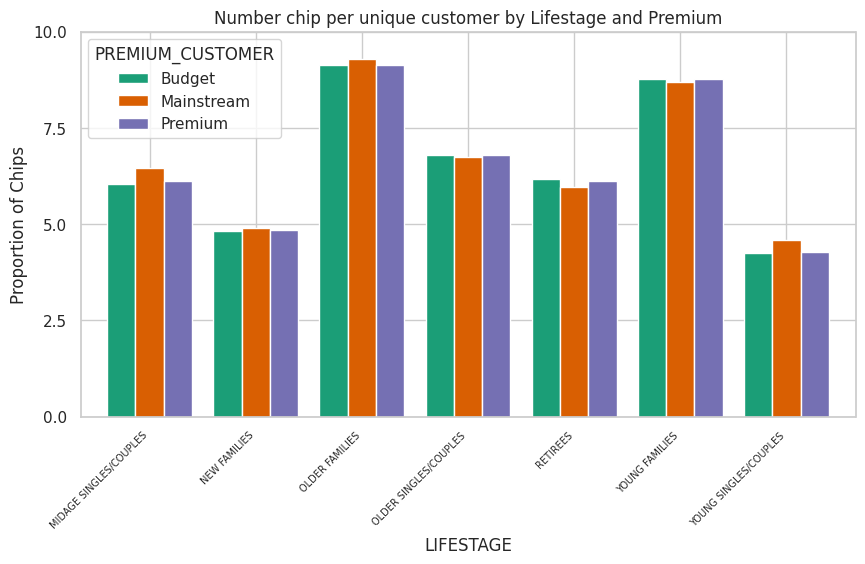

In [ ]:
dt_plt = avg_prod.unstack()
ax = dt_plt.plot(kind='bar', figsize = (10,5), stacked= False, width = 0.8)

plt.xticks(rotation = 45, ha = 'right', fontsize = 7)
plt.yticks(np.arange(0, 11, step=2.5))
plt.ylabel('Proportion of Chips')
plt.title('Number chip per unique customer by Lifestage and Premium')
plt.legend(labels = ['Budget', 'Mainstream','Premium'], title = 'PREMIUM_CUSTOMER', loc = 'upper left')
plt.show()

Older Families and Young Families are likely spend a lot for chips per customer.

## The average chip price by customer segment

In [ ]:
# Average chip price
data['UNIT_PRICE'] = data['TOT_SALES']/data['PROD_QTY']
avg_price = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['UNIT_PRICE'].mean()
avg_price = avg_price.rename('AVG_PRICE')
avg_price.reset_index().sort_values(by='AVG_PRICE', ascending=False).round(2)

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE
19,YOUNG SINGLES/COUPLES,Mainstream,4.06
1,MIDAGE SINGLES/COUPLES,Mainstream,3.99
12,RETIREES,Budget,3.92
14,RETIREES,Premium,3.91
3,NEW FAMILIES,Budget,3.91
4,NEW FAMILIES,Mainstream,3.91
11,OLDER SINGLES/COUPLES,Premium,3.89
9,OLDER SINGLES/COUPLES,Budget,3.88
5,NEW FAMILIES,Premium,3.86
13,RETIREES,Mainstream,3.84


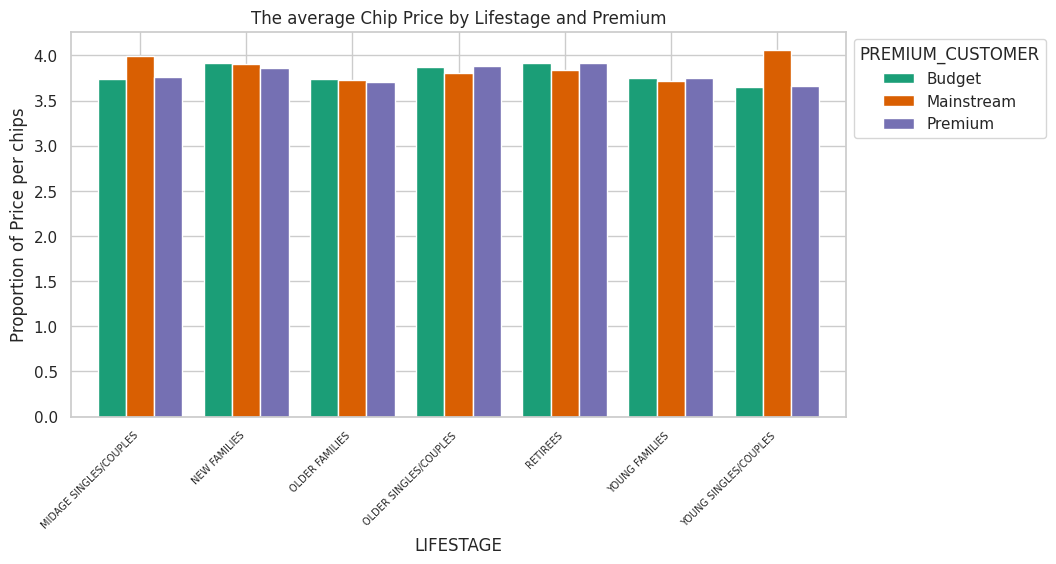

In [ ]:
dt_plt = avg_price.unstack()
ax = dt_plt.plot(kind='bar', figsize = (10,5), stacked= False, width = 0.8)

plt.xticks(rotation = 45, ha = 'right', fontsize = 7)
plt.ylabel('Proportion of Price per chips')
plt.title('The average Chip Price by Lifestage and Premium')
plt.legend(labels = ['Budget', 'Mainstream','Premium'], title = 'PREMIUM_CUSTOMER',
           bbox_to_anchor=(1, 1))
plt.show()

Mainstream - Young and Midage Singles/Couples are the segment willing to pay more per packet of chips compared with Budget and Premium in the same Lifestage. We find that their averages do not differ by much, we can check if this difference is statistically different.

#T-test result

We perform an independent t-test of all Premium segment in Young and Midage Singles/Couples. Moreover, we will test the difference between Midage Singles/Couples and Young Singles/Couples.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
midage = data[data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']
mainstream = midage[midage['PREMIUM_CUSTOMER'] == 'Mainstream']['UNIT_PRICE']
premium = midage[midage['PREMIUM_CUSTOMER'] == 'Premium']['UNIT_PRICE']
budget = midage[midage['PREMIUM_CUSTOMER'] == 'Budget']['UNIT_PRICE']

t1, p1 = ttest_ind(mainstream, premium)
t2, p2 = ttest_ind(mainstream, budget)
print('Mainstream vs Premium:', t1, p1)
print('Mainstream vs Budget:', t2, p2)

Mainstream vs Premium: 14.448006359779288 4.610930561018145e-47
Mainstream vs Budget: 13.902904050958023 1.0974373791542755e-43


In [ ]:
young = data[data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']
mainstream = young[young['PREMIUM_CUSTOMER'] == 'Mainstream']['UNIT_PRICE']
premium = young[young['PREMIUM_CUSTOMER'] == 'Premium']['UNIT_PRICE']
budget = young[young['PREMIUM_CUSTOMER'] == 'Budget']['UNIT_PRICE']

t1, p1 = ttest_ind(mainstream, premium)
t2, p2 = ttest_ind(mainstream, budget)
print('Mainstream vs Premium:', t1, p1)
print('Mainstream vs Budget:', t2, p2)

Mainstream vs Premium: 26.052166137814456 1.0869149942782912e-147
Mainstream vs Budget: 30.603540396946787 2.212121048241047e-202


In [ ]:
print('Young vs Midage: ', ttest_ind(young['UNIT_PRICE'], midage['UNIT_PRICE']))

Young vs Midage:  TtestResult(statistic=2.5601420638325716, pvalue=0.010465462425733525, df=57675.0)


All of p-value are less than 0.5, then we conclude:
* Midage Singles/Couples: the average unit price for Mainstream is higher than Budget and Premium. Similar with Young Singles/Couples.
* The average unit price for Young Singles/Couples is significantly different than Midage Singles/Couples.

# Deep dive into specific customer segments for insights

Let's further explore the segment that purchases the most chips: Young Couples/Singles-Mainstream. We will show which brand has the most purchases.

In [ ]:
mains_and_ycs = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = data[~((data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]

In [ ]:
brand_name = mains_and_ycs['BRAND'].value_counts()
brand_name

,count
BRAND,
Kettle,3844
Doritos,2379
Pringles,2315
Smiths,1921
Infuzions,1250
Thins,1166
RRD,969
Twisties,900
Tostitos,890


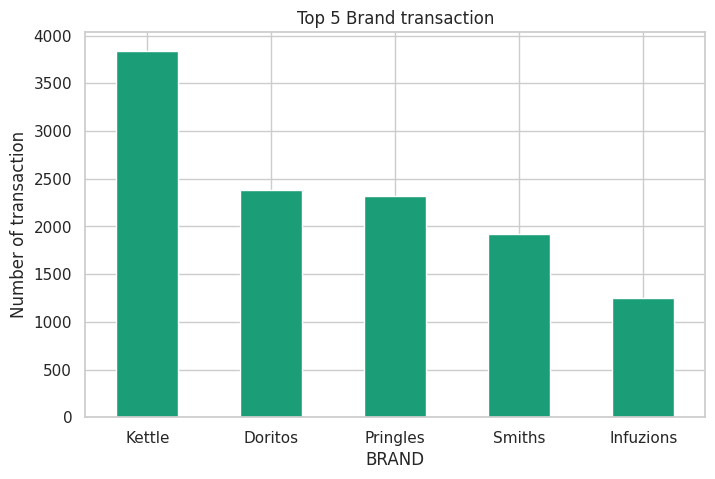

In [ ]:
brand_name[:5].plot(kind = 'bar',figsize=(8,5))
plt.title('Top 5 Brand transaction')
plt.xlabel('BRAND')
plt.ylabel('Number of transaction')
plt.xticks(rotation=0)
plt.show()

The popular brand is Kettle, followed by Doritos and Pringles. Burger is the least attractive in this segment. Moreover, we will look at the total sales over years of this segment.

In [ ]:
month_year = mains_and_ycs[['DATE','TOT_SALES']].copy()
month_year['DATE'] = month_year['DATE'].dt.strftime('%Y-%m')
total = month_year.groupby('DATE').sum()
total

,TOT_SALES
DATE,
2018-07,12194.4
2018-08,12057.3
2018-09,12516.0
2018-10,12568.2
2018-11,12308.4
2018-12,13386.6
2019-01,12234.5
2019-02,11171.6
2019-03,13468.9


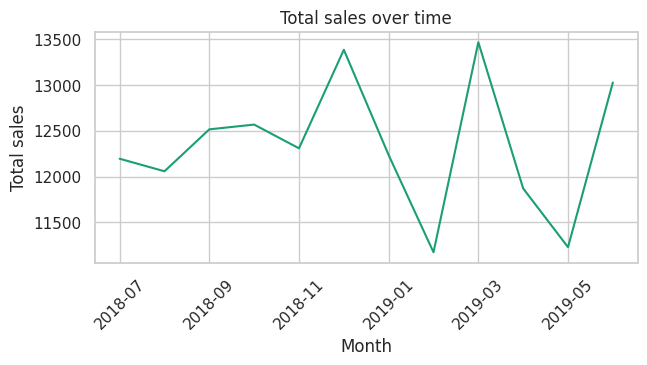

In [ ]:
total.plot(kind='line', legend=False, figsize=(7,3))
plt.xticks(rotation=45)
plt.title('Total sales over time')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.show()

There is a pronounced increase in December, which is immediately followed by a sharp drop.

In [ ]:
mains_and_ycs['PACK_SIZE'].value_counts()

,count
PACK_SIZE,
175,4997
150,3174
134,2315
110,2051
170,1575
330,1195
165,1102
380,626
270,620


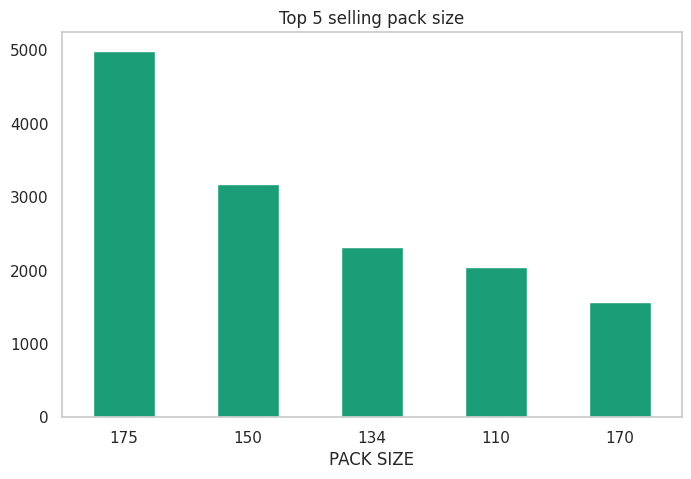

In [ ]:
mains_and_ycs['PACK_SIZE'].value_counts()[:5].plot(kind = 'bar', grid=False,figsize=(8,5))
plt.xlabel('PACK SIZE')
plt.title('Top 5 selling pack size')
plt.xticks(rotation=0)
plt.show()

In [ ]:
def affinity_brand(target, other,feature):
  target_qty = target['PROD_QTY'].sum()
  other_qty = other['PROD_QTY'].sum()
  target_by_feature = target.groupby(feature).agg(targetSegment=('PROD_QTY', 'sum'))/ target_qty
  other_by_feature = other.groupby(feature).agg(otherSegment=('PROD_QTY', 'sum'))/ other_qty
  merge_df = pd.merge(target_by_feature, other_by_feature, left_index=True, right_index=True, how='left')
  merge_df['Brand_Affinity'] = merge_df['targetSegment']/merge_df['otherSegment']
  return merge_df.sort_values(by='Brand_Affinity', ascending=False)

In [ ]:
aff_by_brand = affinity_brand(mains_and_ycs, other, 'BRAND')
aff_by_brand

,targetSegment,otherSegment,Brand_Affinity
BRAND,,,
Tyrrells,0.031409,0.025540,1.229783
Twisties,0.045973,0.037652,1.220995
Doritos,0.122201,0.100476,1.216222
Kettle,0.197082,0.164572,1.197540
Tostitos,0.045203,0.037753,1.197356
Pringles,0.118876,0.100038,1.188301
Cobs,0.044434,0.038817,1.144695
Infuzions,0.064384,0.056726,1.134992
Thins,0.060097,0.056649,1.060879


* Young Singles/Couples-Mainstream are 22.9% more likely to purchase Tyrrells chips compared to the rest of the population

* Young Singles/Couples-Mainstream are 55.6% less likely to purchase Burger Rings compared to the rest of the population

In [ ]:
aff_by_size = affinity_brand(mains_and_ycs, other, 'PACK_SIZE')
aff_by_size

,targetSegment,otherSegment,Brand_Affinity
PACK_SIZE,,,
270,0.031684,0.024947,1.270030
380,0.032013,0.025433,1.258757
330,0.061004,0.049865,1.223396
134,0.118876,0.100038,1.188301
110,0.105795,0.089259,1.185264
210,0.028991,0.024972,1.160911
135,0.014701,0.012998,1.131063
250,0.014289,0.012705,1.124710
170,0.080404,0.080506,0.998740


* Young Singles/Couples-Mainstream are 27% more likely to purchase a 270g pack of chips compared to the rest of the population

* Young Singles/Couples-Mainstream are 55.6% less likely to purchase a 220g pack of chips compared to the rest of the population

In [ ]:
data['PROD_NAME'][data['PACK_SIZE'] == 270].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

# Conclude



1.  ***Recap***


  *   **The segment with the highest total sales**: Older Family-Budget, Young Singles/Couples-Mainstream and Retirees-Mainstream.
  *   **The segment with the most customers spend in chips**: Young Singles/Couples-Mainstream and Retieers-Mainstream.
  *  **The segment with the highest number of chips per customer**: Older Families and Young Families.
  * **The segment with the most customers willing to pay for chips**: Midage Singles/Couples-Mainstream, Young Singles/Couples- Mainstream.
  * Young Singles/Couples- Mainstream are about 23% more likely to spend Tyrrells chips than the rest.
  * The Category Manager wants to boost performance by placing Tyrrells and smaller chip packs in visible areas near spots frequented by young singles and couples, encouraging impulse buying.


2.   ***Recommendations***
* Quantium could help recommend where these segments are and further help them measure the impact of the changed placement.

